In [2]:
# !pip install pysr
import pandas as pd
import numpy as np
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import sympy
import pandas as pd

# Load the dataset
df = pd.read_csv("./fitness_amp_km_vmax_df.csv")

# Identify input and output variables
# EGvar is our target variable (y)
y = df['EGvar'].values * 100  # 放大y，避免loss过小带来的精度问题

# Amp_ex is the xij, while P_Km_relative and P_Vmax_relative are the pi's
# We now use log(Amp_ex + 1) as the first input feature
log_amp_ex = np.log(df['Amp_ex'] + 1)
X = np.column_stack([log_amp_ex, df['P_Km_relative'], df['P_Vmax_relative']])

# It's a good practice to check the shapes of the data
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Let's inspect the first few rows to ensure the data is loaded correctly
print("\nFirst 5 rows of the input data (X):")
print(pd.DataFrame(X, columns=['log_Amp_ex', 'P_Km_relative', 'P_Vmax_relative']).head())
print("\nFirst 5 values of the output data (y):")
print(y[:5])

# check for NaN or Inf values in X and y
print(np.isnan(X).any(), np.isinf(X).any(), np.max(np.abs(X)))
print(np.isnan(y).any(), np.isinf(y).any(), np.max(np.abs(y)))


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython
Shape of X: (380, 3)
Shape of y: (380,)

First 5 rows of the input data (X):
   log_Amp_ex  P_Km_relative  P_Vmax_relative
0    0.000000       1.444821         0.030568
1    2.197225       1.444821         0.030568
2    2.833213       1.444821         0.030568
3    3.496508       1.444821         0.030568
4    4.174387       1.444821         0.030568

First 5 values of the output data (y):
[100.         97.6061235  98.2182139  98.4218593  98.2549637]
False False 10.6072900638496
False False 102.5959294


In [3]:
model = PySRRegressor(
    niterations=1000,
    populations=40,
    binary_operators=["+", "*", "/", "-"],
    unary_operators=["exp", "log", "tanh", "inv",  "square", "cube"],
    complexity_of_operators={"exp": 1, "log": 1, "tanh": 1, "inv": 1, "square": 1, "cube": 1},
    verbosity=1,
    alpha=0.01,
    # set maximum running time
    max_evals=4000000  # 最多尝试4000000个方程
    
)
# Train the model on the entire dataset
# The problem is a single regression problem, not multiple separate ones
model.fit(X, y)

/home/ding_linux/anaconda3/envs/biocircuits/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 1.810e+04
Progress: 112 / 40000 total iterations (0.280%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.565e+02  0.000e+00  y = 88.754
3           3.060e+02  7.630e-02  y = 92.296 - x₀
5           1.437e+02  3.780e-01  y = 112.96 - (x₀ * x₀)
9           1.390e+02  8.175e-03  y = ((-13.863 - x₁) + 127.92) - (x₀ * x₀)
10          1.272e+02  8.873e-02  y = ((100.98 - (square(x₀) * 0.81347)) + 8.5551) - x₁
12          1.272e+02  -0.000e+00  y = ((101.72 - ((square(x₀) * 0.81357) + 0.68678)) + 8.50...
                                       68) - x₁
14          5.309e+01  4.370e-01  y = ((29.447 - x₀) + 42.088) + ((x₀ + 27.409) * tanh(7.014...
                                      7 - x₀))
────────────────────────────────────────────────────────────

[ Info: Final population:
[ Info: Results saved to:


,model_selection,'best'
,binary_operators,"['+', '*', ...]"
,unary_operators,"['exp', 'log', ...]"
,expression_spec,None
,niterations,1000
,populations,40
,population_size,27
,max_evals,4000000
,maxsize,30
,maxdepth,None
,warmup_maxsize_by,None


Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

In [5]:
# 获取 PySR 找到的所有方程（这是一个 Pandas DataFrame）
all_equations = model.equations_

# 根据损失（loss）从低到高排序
sorted_by_loss = all_equations.sort_values(by='loss', ascending=True)
print("按损失排序的前10个方程:")
display(sorted_by_loss.head(10))

# 或者，你也可以根据得分（score）排序，它能更好地平衡复杂度和损失
sorted_by_score = all_equations.sort_values(by='score', ascending=False)
print("按得分排序的前10个方程:")
display(sorted_by_score.head(10))






按损失排序的前10个方程:


,complexity,loss,equation,score,sympy_format,lambda_format
23,30,26.690039,(x0 * ((((x0 - 2.4489992) * (square(log(x1)) -...,0.000336,x0*(-0.08305033*(x0 - 2.4489992)*(1.2042162*x1...,PySRFunction(X=>x0*(-0.08305033*(x0 - 2.448999...
22,28,26.707993,((x0 - 2.4323) * (((square(log(x1)) - ((x1 * -...,0.026473,-0.08384762*x0*(x0 - 2.4323)*(1.1791111*x1 - 4...,PySRFunction(X=>-0.08384762*x0*(x0 - 2.4323)*(...
21,27,27.424477,((tanh(7.015018 - x0) * 36.74692) + (((2.60495...,0.000886,(2.6049595 - x0)*(x0*(-(-0.2726726)*x1 + tanh(...,PySRFunction(X=>(2.6049595 - x0)*(x0*(-(-0.272...
20,25,27.473127,((x0 * ((2.6357934 - x0) * ((tanh(x2 / -0.2114...,0.013478,x0*(2.6357934 - x0)*(-(-0.27548692)*x1 + tanh(...,PySRFunction(X=>x0*(2.6357934 - x0)*(-(-0.2754...
19,23,28.223766,(62.727543 - (x0 * (((x1 * 0.21916987) - tanh(...,0.010822,-0.5999781*x0*(x0 - 1*2.378116)*(x1*0.21916987...,PySRFunction(X=>-0.5999781*x0*(x0 - 1*2.378116...
18,22,28.530855,(tanh(7.022515 - x0) * 36.0314) + (62.545467 -...,0.005642,-0.47987452*x0*x0*(x1*0.18124741 - tanh(tanh(x...,PySRFunction(X=>-0.47987452*x0*x0*(x1*0.181247...
17,21,28.692287,(62.664158 - (((x0 * x0) * ((x1 * 0.21599145) ...,0.020677,-0.40294048*x0*x0*(x1*0.21599145 - tanh(x2)) +...,PySRFunction(X=>-0.40294048*x0*x0*(x1*0.215991...
16,20,29.291725,((tanh(7.0324106 - x0) * 35.847572) + 62.88486...,0.000008,-x0*x0*(x1*0.086384654 - 0.29352936*x2) + tanh...,PySRFunction(X=>-x0*x0*(x1*0.086384654 - 0.293...
15,19,29.291970,((tanh(7.0303335 - x0) * 35.779427) - (square(...,0.064554,-0.29348959531024*x0**2*(x1*0.29484656 - x2) +...,PySRFunction(X=>-0.29348959531024*x0**2*(x1*0....
14,18,31.245256,(((2.4204667 - x0) * (x1 - (x2 * 3.0282273))) ...,0.046897,(2.4204667 - x0)*(x1 - 3.0282273*x2) + tanh(7....,PySRFunction(X=>(2.4204667 - x0)*(x1 - 3.02822...


按得分排序的前10个方程:


,complexity,loss,equation,score,sympy_format,lambda_format
2,4,143.667860,112.958954 - square(x0),0.753761,112.958954 - x0**2,PySRFunction(X=>112.958954 - x0**2)
3,6,74.126020,tanh(8.061392 - x0) * 96.89081,0.330869,tanh(8.061392 - x0)*96.89081,PySRFunction(X=>tanh(8.061392 - x0)*96.89081)
4,7,57.104313,tanh(exp(6.7964635 - x0)) * 97.828804,0.260887,tanh(exp(6.7964635 - x0))*97.828804,PySRFunction(X=>tanh(exp(6.7964635 - x0))*97.8...
13,16,34.317703,(tanh(7.0561557 - x0) * 35.45) + ((x0 * (x2 + ...,0.161844,x0*(x1*(-0.4407413) + x2) + tanh(7.0561557 - x...,PySRFunction(X=>x0*(x1*(-0.4407413) + x2) + ta...
10,13,42.250470,(log(x2) + (tanh(7.045976 - x0) * 35.55648)) +...,0.096878,-x1 + log(x2) - 35.55648*tanh(x0 - 7.045976) +...,PySRFunction(X=>-x1 + log(x2) - 35.55648*tanh(...
1,3,305.290800,93.1425 - x0,0.077498,93.1425 - x0,PySRFunction(X=>93.1425 - x0)
7,10,48.483395,(tanh(7.0456986 - x0) * 35.54657) + (64.50988 ...,0.075449,-x1 + tanh(7.0456986 - x0)*35.54657 + 64.50988,PySRFunction(X=>-x1 + tanh(7.0456986 - x0)*35....
5,8,53.107330,(tanh(7.0458302 - x0) * 35.550884) + 63.40968,0.072565,tanh(7.0458302 - x0)*35.550884 + 63.40968,PySRFunction(X=>tanh(7.0458302 - x0)*35.550884...
15,19,29.291970,((tanh(7.0303335 - x0) * 35.779427) - (square(...,0.064554,-0.29348959531024*x0**2*(x1*0.29484656 - x2) +...,PySRFunction(X=>-0.29348959531024*x0**2*(x1*0....
14,18,31.245256,(((2.4204667 - x0) * (x1 - (x2 * 3.0282273))) ...,0.046897,(2.4204667 - x0)*(x1 - 3.0282273*x2) + tanh(7....,PySRFunction(X=>(2.4204667 - x0)*(x1 - 3.02822...


Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

找到的最佳通用方程:
Equation: (tanh(7.022515 - x0) * 36.0314) + (62.545467 - (((x0 * x0) * ((x1 * 0.18124741) - tanh(tanh(x2)))) * 0.47987452))
Loss: 28.5309
Score: 0.0056


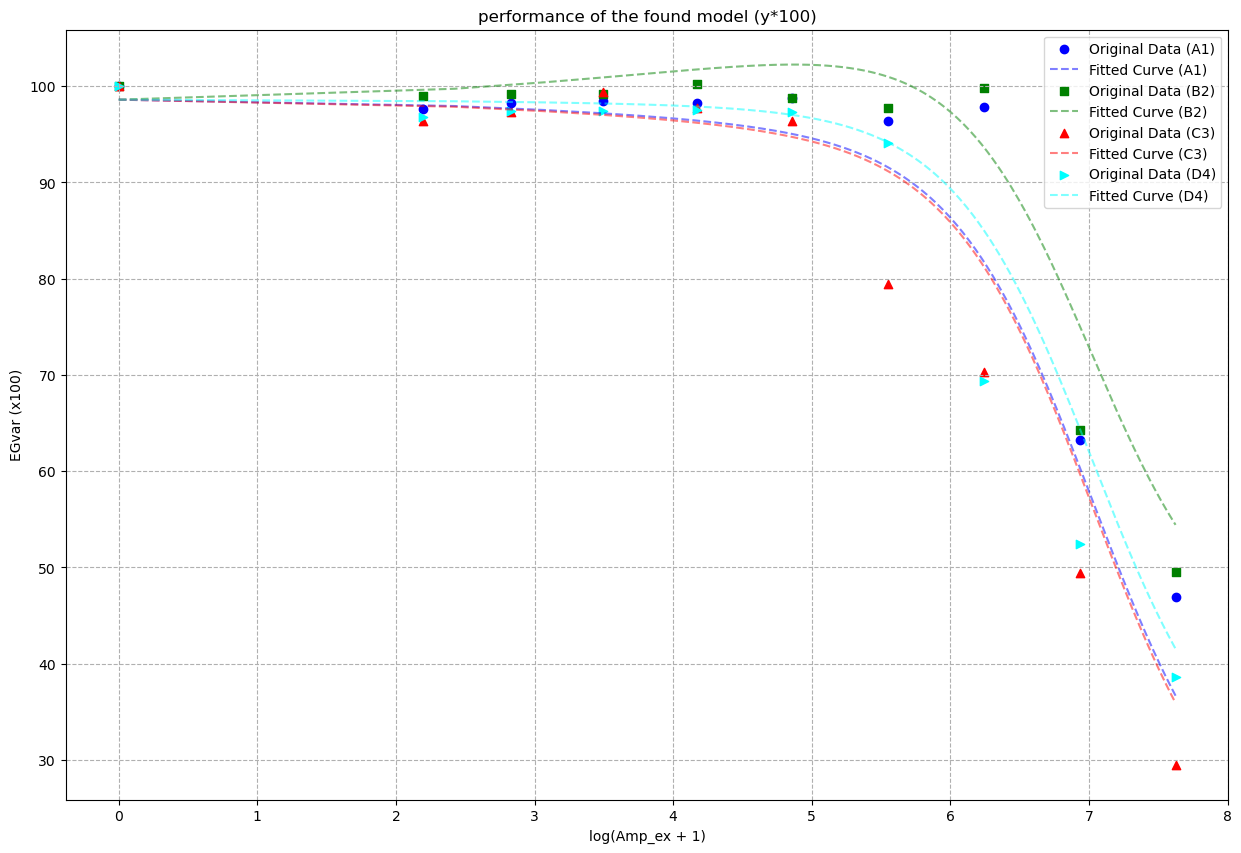

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

In [12]:
# manually select the best equation
best_equation_info = sorted_by_loss.iloc[5]
best_equation_str = best_equation_info['equation']

print("找到的最佳通用方程:")
print(f"Equation: {best_equation_str}")
print(f"Loss: {best_equation_info['loss']:.4f}")
print(f"Score: {best_equation_info['score']:.4f}")

best_equation = best_equation_info['sympy_format']

# 2. 准备 SymPy 变量和可调用函数
log_amp_ex, p_km_relative, p_vmax_relative = sympy.symbols('x0 x1 x2')
eval_func = sympy.lambdify(
    [log_amp_ex, p_km_relative, p_vmax_relative],
    best_equation,
    modules=['numpy']
)

# 3. 选择要可视化的突变体
mutants_to_plot = ['A1', 'B2', 'C3','D4']

# 4. 绘制所有选定突变体的数据和拟合曲线
plt.figure(figsize=(15, 10))
markers = ['o', 's', '^','>']
colors = ['blue', 'green', 'red','cyan']

for i, mutant_id in enumerate(mutants_to_plot):
    mutant_data = df[df['Mutant'] == mutant_id]
    
    p_km_rel = mutant_data['P_Km_relative'].iloc[0]
    p_vmax_rel = mutant_data['P_Vmax_relative'].iloc[0]
    
    x_data = mutant_data['Amp_ex'].values
    y_data = mutant_data['EGvar'].values * 100  # 与训练保持一致，放大100倍
    
    # 使用 log(Amp_ex + 1) 作为横坐标
    log_x_data = np.log(x_data + 1)
    
    # 绘制原始数据点
    plt.scatter(
        log_x_data,
        y_data,
        marker=markers[i],
        color=colors[i],
        label=f'Original Data ({mutant_id})'
    )
    
    # 为拟合曲线生成更密集的 x 值（Amp_ex 原始空间）
    x_smooth = np.linspace(x_data.min(), x_data.max(), 200)
    log_x_smooth = np.log(x_smooth + 1)
    
    # 使用通用模型和该突变体的参数进行预测
    y_pred_smooth = eval_func(log_x_smooth, p_km_rel, p_vmax_rel)
    
    # 绘制拟合曲线
    plt.plot(
        log_x_smooth,
        y_pred_smooth,
        color=colors[i],
        lw=1.5,
        alpha=0.5,
        linestyle='--',
        label=f'Fitted Curve ({mutant_id})'
    )

plt.title('performance of the found model (y*100)')
plt.xlabel('log(Amp_ex + 1)')
plt.ylabel('EGvar (x100)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

用于逆向推导的通用方程:
 -0.47987452*x0*x0*(x1*0.18124741 - tanh(tanh(x2))) + tanh(7.022515 - x0)*36.0314 + 62.545467
Mutant A1 - Predicted: [2.5842 0.56  ], Actual: [1.4448 0.0306]
Mutant A10 - Predicted: [2.3938 0.5032], Actual: [0.9497 0.5919]
Mutant A11 - Predicted: [4.0907 1.8701], Actual: [0.7584 0.0476]
Mutant A2 - Predicted: [2.8114 0.6359], Actual: [1.2949 0.8939]
Mutant A3 - Predicted: [2.1597 0.4398], Actual: [1.3359 0.0778]
Mutant A4 - Predicted: [2.6231 0.5723], Actual: [1.1669 0.0863]
Mutant A6 - Predicted: [2.8636 0.6549], Actual: [1.1841 0.8578]
Mutant A7 - Predicted: [2.578 0.558], Actual: [0.5561 0.2725]
Mutant A8 - Predicted: [3.5739 1.0238], Actual: [0.3197 0.0062]
Mutant A9 - Predicted: [1.9516 0.388 ], Actual: [0.2719 0.0045]
Mutant B10 - Predicted: [3.1281 0.7633], Actual: [0.34   0.0058]
Mutant B11 - Predicted: [2.7117 0.6013], Actual: [0.3102 0.0048]
Mutant B2 - Predicted: [2.6861 0.5928], Actual: [1.3772 1.0525]
Mutant B3 - Predicted: [3.9246 1.4211], Actual: [1.2   1.47

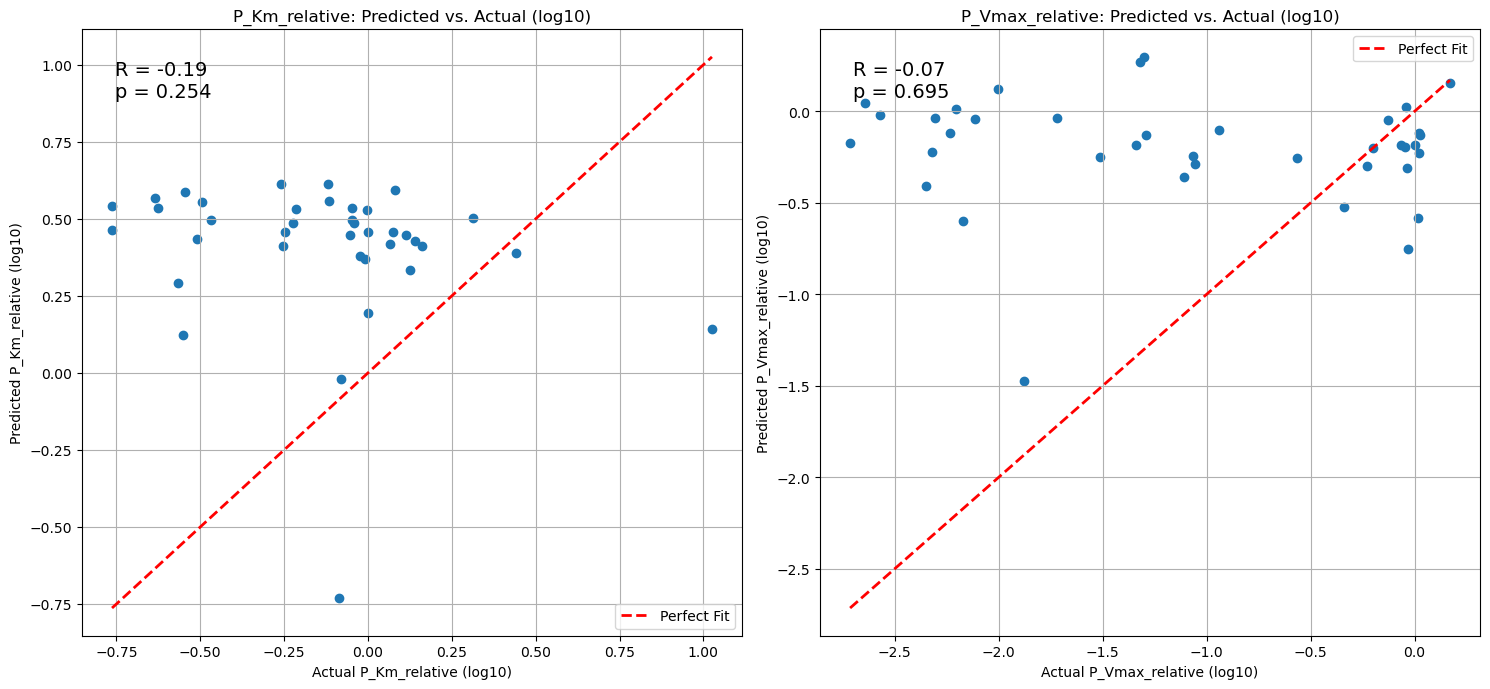

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

In [15]:
from scipy.optimize import minimize
from scipy.stats import pearsonr
print("用于逆向推导的通用方程:\n", best_equation)

# 准备 SymPy 变量和可调用函数
amp_ex, p_km_relative, p_vmax_relative = sympy.symbols('x0 x1 x2')
eval_func = sympy.lambdify(
    [amp_ex, p_km_relative, p_vmax_relative],
    best_equation,
    modules=['numpy']
)

# -----------------
# 定义损失函数
# -----------------
def loss_function(params, x_data, y_true):
    p_km, p_vmax = params
    y_pred = eval_func(x_data, p_km, p_vmax)
    return np.sum((y_true - y_pred)**2)

# -----------------
# 逆向推导并收集结果
# -----------------
# 选择所有的突变体进行测试
test_mutants = df['Mutant'].unique().tolist()

predicted_params = []
actual_params = []

param_bounds = ((0.0, 5.0), (0.0, 2.0))

for mutant_id in test_mutants:
    mutant_data = df[df['Mutant'] == mutant_id]
    
    if mutant_data.empty:
        print(f"警告：Mutant {mutant_id} 在数据中不存在，已跳过。")
        continue

    x_data = mutant_data['Amp_ex'].values
    y_true = mutant_data['EGvar'].values
    
    initial_guess = np.random.rand(2) * (np.array([5.0, 2.0]) - np.array([0.0, 0.0])) + np.array([0.0, 0.0])
    
    result = minimize(
        loss_function,
        initial_guess,
        args=(x_data, y_true),
        method='L-BFGS-B',
        bounds=param_bounds
    )
    
    if result.success:
        predicted_params.append(result.x)
        actual_params.append([mutant_data['P_Km_relative'].iloc[0], mutant_data['P_Vmax_relative'].iloc[0]])
        print(f"Mutant {mutant_id} - Predicted: {np.round(result.x, 4)}, Actual: {np.round(actual_params[-1], 4)}")
    else:
        print(f"Mutant {mutant_id} optimization failed.")

predicted_params = np.array(predicted_params)
actual_params = np.array(actual_params)

# -----------------
# 可视化对比结果 (x,y轴取log)
# -----------------
if predicted_params.size > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # 定义一个小的常数，以处理log(0)的情况
    epsilon = 1e-9

    # 绘制 P_Km_relative 的对比图
    actual_p_km_log = np.log10(actual_params[:, 0] + epsilon)
    predicted_p_km_log = np.log10(predicted_params[:, 0] + epsilon)
    
    r_km, p_km = pearsonr(actual_p_km_log, predicted_p_km_log)
    
    axes[0].scatter(actual_p_km_log, predicted_p_km_log)
    axes[0].plot(
        [actual_p_km_log.min(), actual_p_km_log.max()],
        [actual_p_km_log.min(), actual_p_km_log.max()],
        'r--', lw=2, label='Perfect Fit'
    )
    axes[0].set_title('P_Km_relative: Predicted vs. Actual (log10)')
    axes[0].set_xlabel('Actual P_Km_relative (log10)')
    axes[0].set_ylabel('Predicted P_Km_relative (log10)')
    axes[0].legend()
    axes[0].grid(True)
    axes[0].text(
        0.05, 0.95, 
        f"R = {r_km:.2f}\np = {p_km:.3f}", 
        transform=axes[0].transAxes, 
        fontsize=14, 
        verticalalignment='top'
    )

    # 绘制 P_Vmax_relative 的对比图
    actual_p_vmax_log = np.log10(actual_params[:, 1] + epsilon)
    predicted_p_vmax_log = np.log10(predicted_params[:, 1] + epsilon)
    
    r_vmax, p_vmax = pearsonr(actual_p_vmax_log, predicted_p_vmax_log)
    
    axes[1].scatter(actual_p_vmax_log, predicted_p_vmax_log)
    axes[1].plot(
        [actual_p_vmax_log.min(), actual_p_vmax_log.max()],
        [actual_p_vmax_log.min(), actual_p_vmax_log.max()],
        'r--', lw=2, label='Perfect Fit'
    )
    axes[1].set_title('P_Vmax_relative: Predicted vs. Actual (log10)')
    axes[1].set_xlabel('Actual P_Vmax_relative (log10)')
    axes[1].set_ylabel('Predicted P_Vmax_relative (log10)')
    axes[1].legend()
    axes[1].grid(True)
    axes[1].text(
        0.05, 0.95, 
        f"R = {r_vmax:.2f}\np = {p_vmax:.3f}", 
        transform=axes[1].transAxes, 
        fontsize=14, 
        verticalalignment='top'
    )

    plt.tight_layout()
    plt.show()